In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [65]:
# Import Data 
path = '/Users/Administrator/Desktop/'
file = pd.read_csv(path + 'term-deposit-marketing-2020.csv')
DF = pd.DataFrame(file)
#displaying data
DF.head(36)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [28]:
DF.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y',
       'Predicted'],
      dtype='object')

In [4]:
y = DF['y']

In [24]:
DF['y'].value_counts()

0    11960
1       40
Name: y, dtype: int64

In [87]:
X = DF.loc[:,DF.columns!='y']
from sklearn.preprocessing import OneHotEncoder
dfcat = X.select_dtypes(include ='object') 
enc = OneHotEncoder(sparse=False)
X_transdf = enc.fit_transform(dfcat)

In [88]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transdf, y, test_size=0.3)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [8]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfclf = RandomForestClassifier(max_depth=20)
# Random search of parameters, using 3 fold cross validation, 
# search across  different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfclf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [9]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [10]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [11]:
from sklearn.metrics import classification_report
prediction = best_random.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.93      1.00      0.96     11118
         yes       0.50      0.02      0.04       882

    accuracy                           0.93     12000
   macro avg       0.71      0.51      0.50     12000
weighted avg       0.90      0.93      0.89     12000



In [12]:
Pred = best_random.predict(X_test)
Pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [15]:
Preds= []
for i in Pred: 
    if i == 'yes': 
       Preds.append(1) 
    elif i == 'no': 
       Preds.append(0) 
DF['y'] = Preds

<ipython-input-15-265372f65120>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['y'] = Preds


In [14]:
DF = DF[:12000]

In [17]:
DF.insert(14, 'Predicted', Preds)

In [18]:
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,Predicted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0


In [19]:
# define the tree depths to evaluate
values = [i for i in range(1, 30)]

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []
for i in values:
    # configure the model
    rf = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    rf.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.928, test: 0.926
>2, train: 0.928, test: 0.926
>3, train: 0.928, test: 0.926
>4, train: 0.928, test: 0.926
>5, train: 0.928, test: 0.926
>6, train: 0.928, test: 0.926
>7, train: 0.929, test: 0.927
>8, train: 0.930, test: 0.926
>9, train: 0.930, test: 0.927
>10, train: 0.930, test: 0.927
>11, train: 0.931, test: 0.927
>12, train: 0.931, test: 0.926
>13, train: 0.932, test: 0.926
>14, train: 0.933, test: 0.926
>15, train: 0.934, test: 0.925
>16, train: 0.935, test: 0.925
>17, train: 0.935, test: 0.925
>18, train: 0.936, test: 0.924
>19, train: 0.936, test: 0.924
>20, train: 0.936, test: 0.923
>21, train: 0.937, test: 0.924
>22, train: 0.937, test: 0.923
>23, train: 0.937, test: 0.922
>24, train: 0.937, test: 0.923
>25, train: 0.937, test: 0.923
>26, train: 0.937, test: 0.922
>27, train: 0.937, test: 0.922
>28, train: 0.937, test: 0.922
>29, train: 0.937, test: 0.922


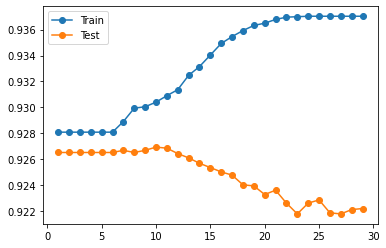

In [21]:
# plot of train and test scores vs tree depth
import matplotlib.pyplot as plt
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [69]:
best_random.feature_importances_[:13]

array([0.0209223 , 0.01955375, 0.01155395, 0.00701354, 0.02233967,
       0.02479807, 0.01532106, 0.01606746, 0.0085296 , 0.02443647,
       0.01306233, 0.00162997, 0.01738813])

<BarContainer object of 13 artists>

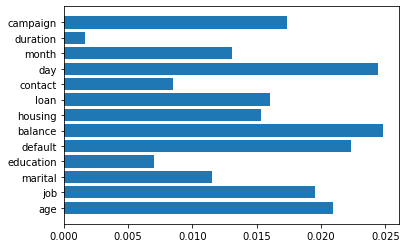

In [86]:
dsetfeat = pd.DataFrame(DF, index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],  columns=index)
plt.barh(dsetfeat.index, best_random.feature_importances_[:13])